#### 1. Data Loading and Initial Exploration

In [2]:
import pandas as pd
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
print("Missing values in Customers.csv:")
print(customers.isnull().sum())

print("\nMissing values in Products.csv:")
print(products.isnull().sum())

print("\nMissing values in Transactions.csv:")
print(transactions.isnull().sum())

print("\nDuplicate rows in Customers.csv:", customers.duplicated().sum())
print("Duplicate rows in Products.csv:", products.duplicated().sum())
print("Duplicate rows in Transactions.csv:", transactions.duplicated().sum())

print("\nData types in Customers.csv:")
print(customers.dtypes)

print("\nData types in Products.csv:")
print(products.dtypes)

print("\nData types in Transactions.csv:")
print(transactions.dtypes)

Missing values in Customers.csv:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products.csv:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions.csv:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate rows in Customers.csv: 0
Duplicate rows in Products.csv: 0
Duplicate rows in Transactions.csv: 0

Data types in Customers.csv:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Data types in Products.csv:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

Data types in Transactions.csv:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float

#### 2. Data Type Conversion

In [6]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

print("Transactions data types after conversion:")
print(transactions.dtypes)

print("\nCustomers data types after conversion:")
print(customers.dtypes)

Transactions data types after conversion:
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

Customers data types after conversion:
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object


#### 3. Data Merging

In [8]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')
print("\nMerged dataset:")
print(merged_data.head())


Merged dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Sp

#### 4. Basic Statistics

In [10]:
basic_stats = merged_data[['TotalValue', 'Quantity', 'Price_x']].describe()
print("Basic Statistics for Numerical Columns:")
print(basic_stats)

Basic Statistics for Numerical Columns:
        TotalValue     Quantity     Price_x
count  1000.000000  1000.000000  1000.00000
mean    689.995560     2.537000   272.55407
std     493.144478     1.117981   140.73639
min      16.080000     1.000000    16.08000
25%     295.295000     2.000000   147.95000
50%     588.880000     3.000000   299.93000
75%    1011.660000     4.000000   404.40000
max    1991.040000     4.000000   497.76000


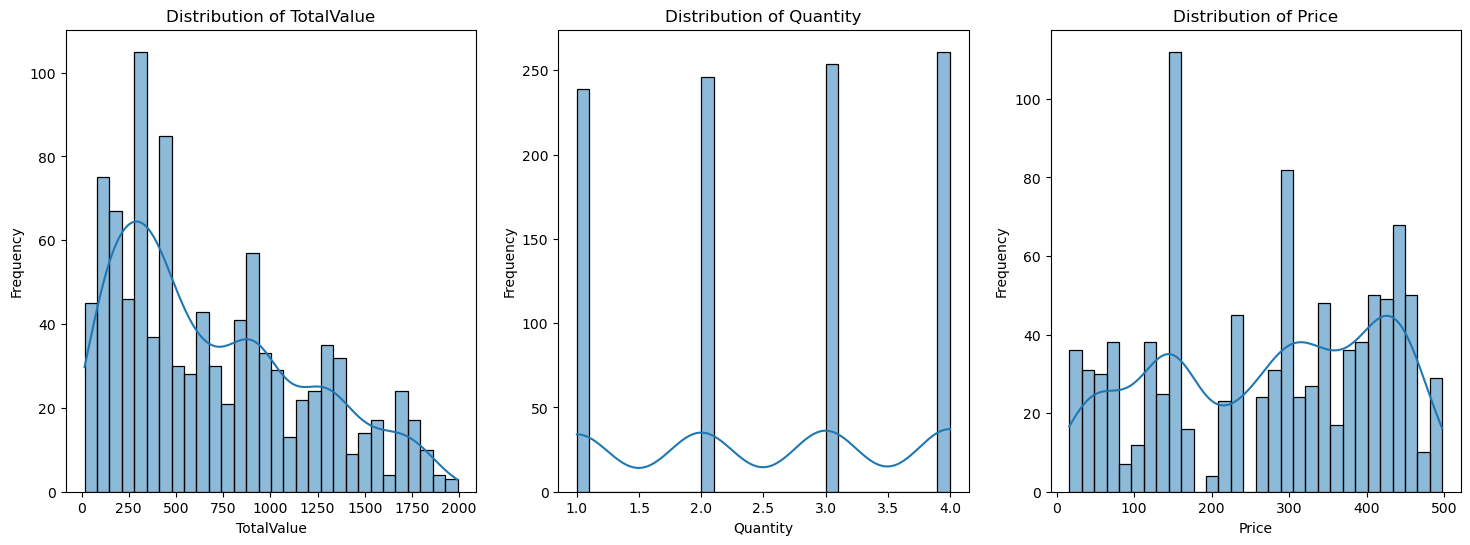

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(merged_data['TotalValue'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of TotalValue')
axes[0].set_xlabel('TotalValue')
axes[0].set_ylabel('Frequency')

sns.histplot(merged_data['Quantity'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')

sns.histplot(merged_data['Price_x'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Price')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

plt.show()

In [14]:
region_freq = merged_data['Region'].value_counts()
category_freq = merged_data['Category'].value_counts()
customer_freq = merged_data['CustomerID'].value_counts()

print("\nFrequency of Transactions by Region:")
print(region_freq)

print("\nFrequency of Transactions by Category:")
print(category_freq)

print("\nTop 10 Customers by Transaction Frequency:")
print(customer_freq.head(10))


Frequency of Transactions by Region:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

Frequency of Transactions by Category:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

Top 10 Customers by Transaction Frequency:
CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64


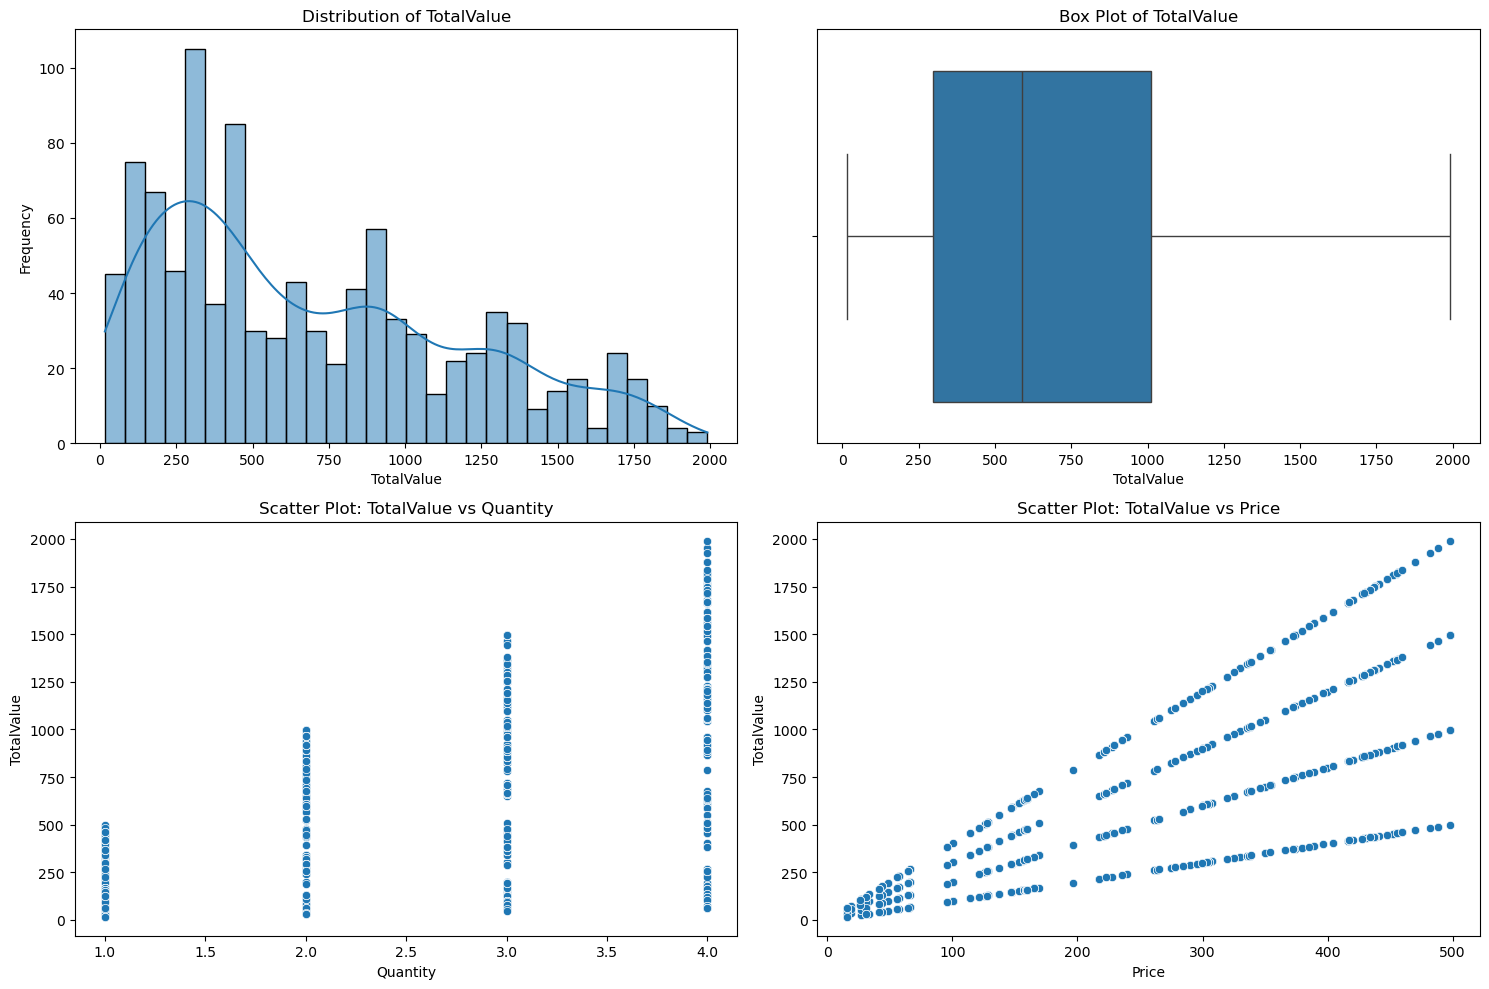

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(merged_data['TotalValue'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of TotalValue')
axes[0, 0].set_xlabel('TotalValue')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x=merged_data['TotalValue'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of TotalValue')
axes[0, 1].set_xlabel('TotalValue')

sns.scatterplot(x=merged_data['Quantity'], y=merged_data['TotalValue'], ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot: TotalValue vs Quantity')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('TotalValue')

sns.scatterplot(x=merged_data['Price_x'], y=merged_data['TotalValue'], ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot: TotalValue vs Price')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('TotalValue')

plt.tight_layout()
plt.show()

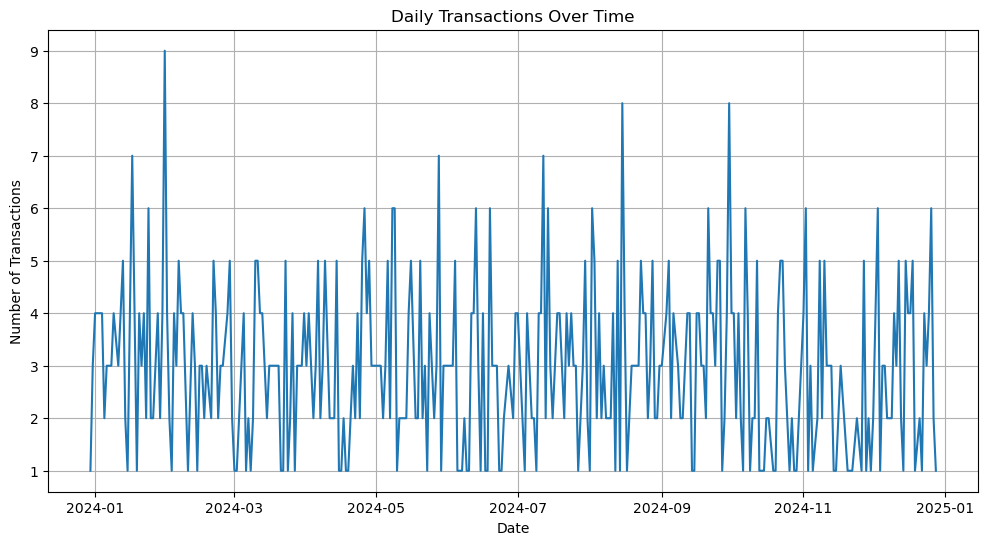

In [18]:
daily_transactions = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TransactionID'].count()

plt.figure(figsize=(12, 6))
daily_transactions.plot()
plt.title('Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

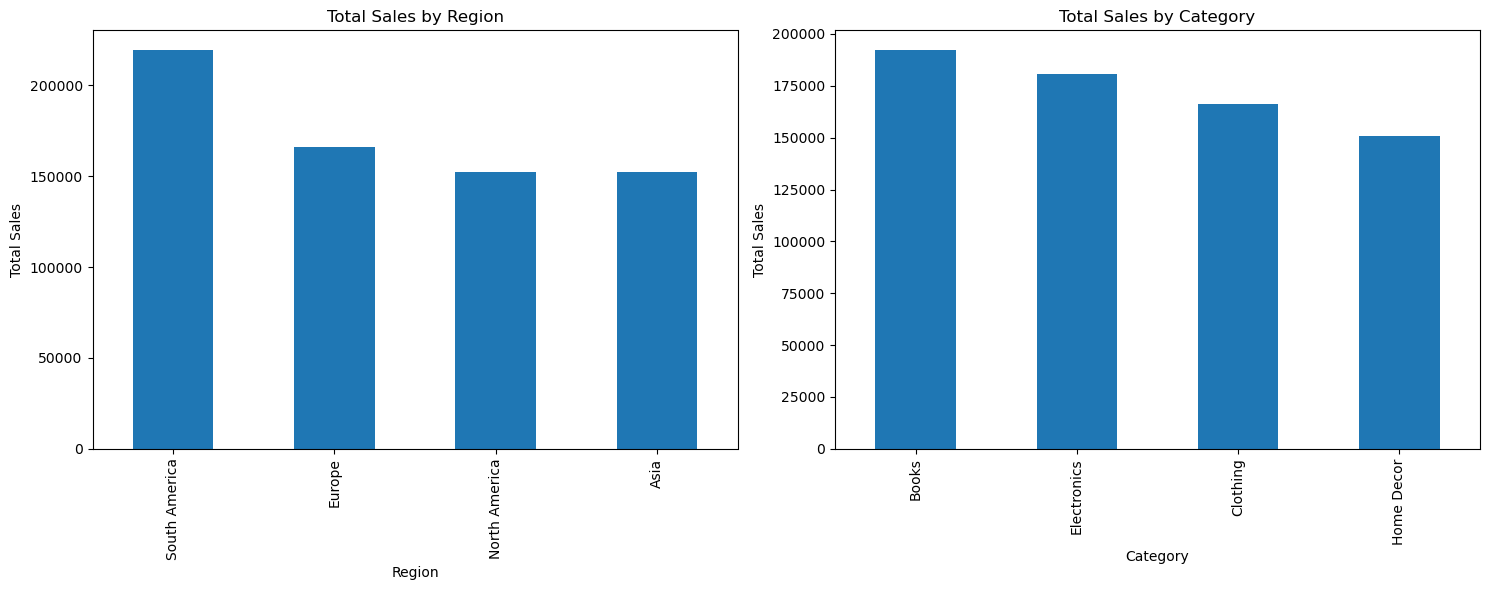

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', ax=axes[0])
axes[0].set_title('Total Sales by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total Sales')

category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Sales by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [22]:
correlation_matrix = merged_data[['TotalValue', 'Quantity', 'Price_x']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            TotalValue  Quantity   Price_x
TotalValue    1.000000  0.609972  0.722714
Quantity      0.609972  1.000000 -0.009378
Price_x       0.722714 -0.009378  1.000000


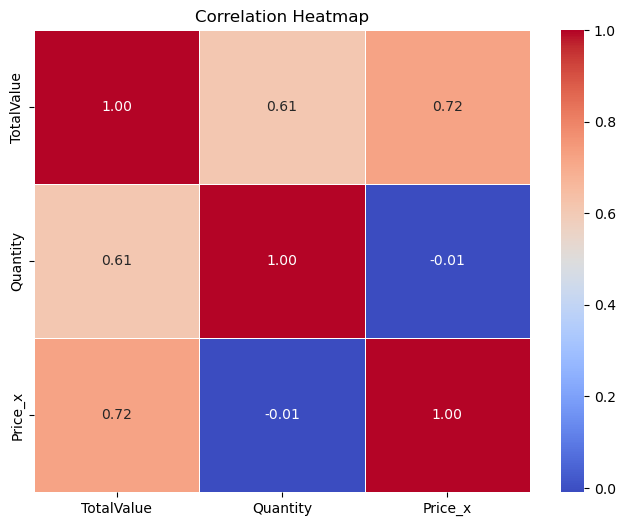

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
from datetime import datetime

# Set reference date (latest transaction + 1 day)
ref_date = merged_data['TransactionDate'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = merged_data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (ref_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                # Frequency
    'TotalValue': 'sum'                                      # Monetary
}).rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TotalValue': 'Monetary'
})

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
C0001,56,5,3354.52
C0002,26,4,1862.74
C0003,126,4,2725.38
C0004,5,8,5354.88
C0005,55,3,2034.24


In [30]:
# Higher recency = worse, so we reverse it
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])  
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5])  
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])  

# Combine scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score_Sum'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Score_Sum
CustomerID,,,,,,,,
C0001,56,5,3354.52,3,3,3,333,9
C0002,26,4,1862.74,4,2,1,421,7
C0003,126,4,2725.38,1,2,2,122,5
C0004,5,8,5354.88,5,5,5,555,15
C0005,55,3,2034.24,3,1,2,312,6


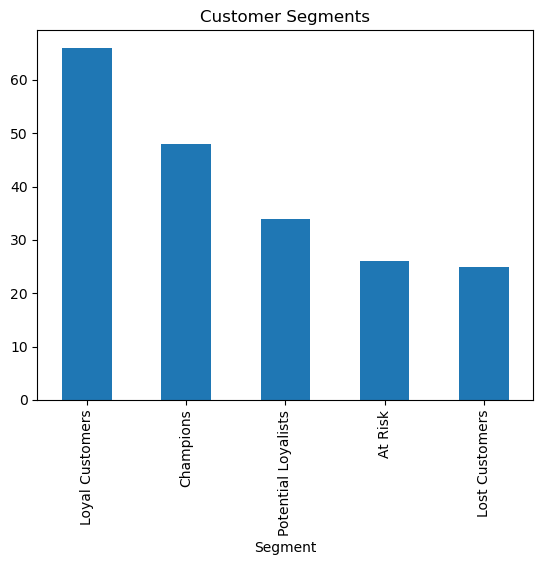

In [34]:
import numpy as np  # Add this import at the top of your notebook

# Define segments
segments = {
    'Champions': (rfm['RFM_Score_Sum'] >= 12),
    'Loyal Customers': (rfm['RFM_Score_Sum'] >= 9) & (rfm['RFM_Score_Sum'] < 12),
    'Potential Loyalists': (rfm['RFM_Score_Sum'] >= 7) & (rfm['RFM_Score_Sum'] < 9),
    'At Risk': (rfm['RFM_Score_Sum'] >= 5) & (rfm['RFM_Score_Sum'] < 7),
    'Lost Customers': (rfm['RFM_Score_Sum'] < 5)
}

# Assign segments
rfm['Segment'] = np.select(segments.values(), segments.keys(), default='Unknown')

# Plot segment distribution
rfm['Segment'].value_counts().plot(kind='bar', title='Customer Segments')
plt.show()

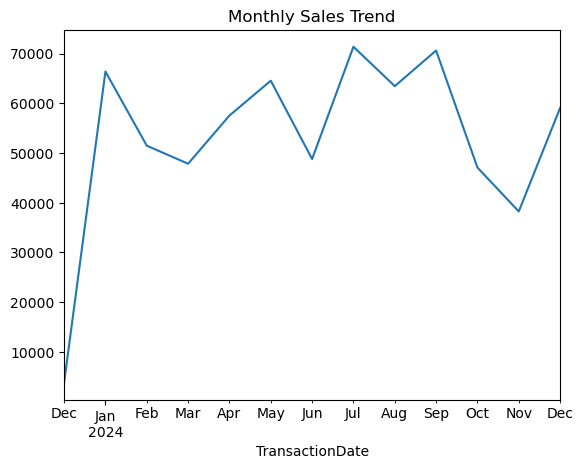

In [38]:
# Convert to monthly sales
monthly_sales = merged_data.set_index('TransactionDate').resample('ME')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trend')
plt.show()

In [46]:
from datetime import datetime

# Set a reference date (e.g., the latest transaction date + 1 day)
snapshot_date = merged_data['TransactionDate'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = merged_data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                     # Frequency
    'TotalValue': 'sum'                                           # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

  CustomerID  Recency  Frequency  Monetary
0      C0001       56          5   3354.52
1      C0002       26          4   1862.74
2      C0003      126          4   2725.38
3      C0004        5          8   5354.88
4      C0005       55          3   2034.24


In [48]:
# Assign quartile-based scores (1-4)
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4])

# Combine scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print(rfm.head())

  CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
0      C0001       56          5   3354.52       3       2       3       323
1      C0002       26          4   1862.74       3       2       1       321
2      C0003      126          4   2725.38       1       2       2       122
3      C0004        5          8   5354.88       4       4       4       444
4      C0005       55          3   2034.24       3       1       1       311


In [50]:
# Define segments based on RFM scores
segment_map = {
    r'[4][4][4]': 'Champions',
    r'[3-4][3-4][3-4]': 'Loyal',
    r'[2-3][2-3][2-3]': 'Potential Loyalists',
    r'[1-2][1-2][1-2]': 'At Risk',
    r'1[1-2][1-2]': 'Hibernating',
    r'[1-2]11': 'Lost'
}

rfm['Segment'] = rfm['RFM_Score'].replace(segment_map, regex=True)
rfm['Segment'] = rfm['Segment'].fillna('Others')

print(rfm['Segment'].value_counts())

Segment
At Risk                40
Potential Loyalists    36
Loyal                  24
Champions              15
422                    11
311                     7
411                     6
244                     6
321                     5
123                     4
144                     4
224                     4
421                     4
243                     4
423                     4
312                     3
124                     3
143                     3
424                     3
113                     3
142                     2
134                     2
442                     1
133                     1
213                     1
412                     1
132                     1
234                     1
Name: count, dtype: int64


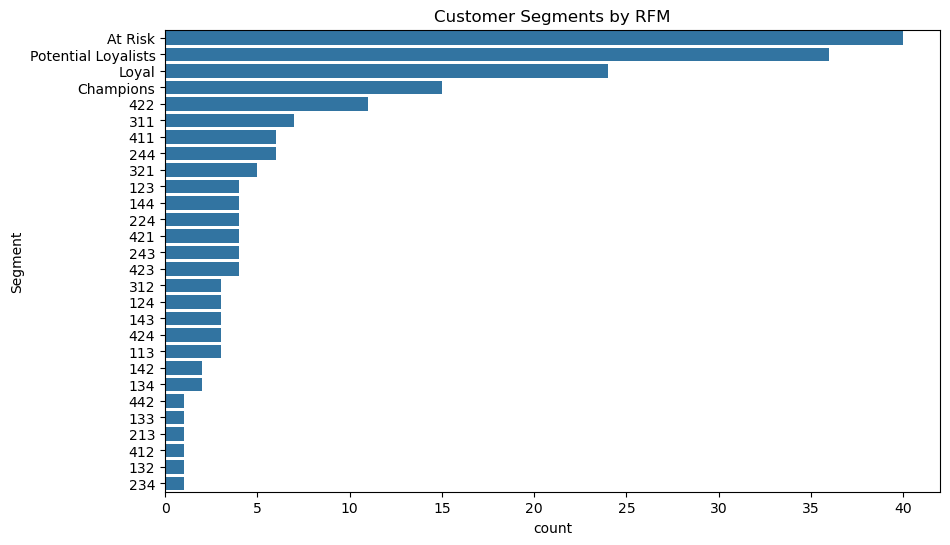

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, y='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Segments by RFM')
plt.show()

In [54]:
# Define high-value customers (top 20% by spending)
high_value_threshold = rfm['Monetary'].quantile(0.8)
rfm['Value_Segment'] = np.where(rfm['Monetary'] >= high_value_threshold, 'High-Value', 'Low-Value')

print(rfm['Value_Segment'].value_counts())

Value_Segment
Low-Value     159
High-Value     40
Name: count, dtype: int64


In [56]:
# Define frequent buyers (top 25% by transaction count)
frequent_threshold = rfm['Frequency'].quantile(0.75)
rfm['Frequency_Segment'] = np.where(
    rfm['Frequency'] >= frequent_threshold,
    'Frequent Buyer',
    'Occasional Buyer'
)

print(rfm['Frequency_Segment'].value_counts())

Frequency_Segment
Occasional Buyer    125
Frequent Buyer       74
Name: count, dtype: int64


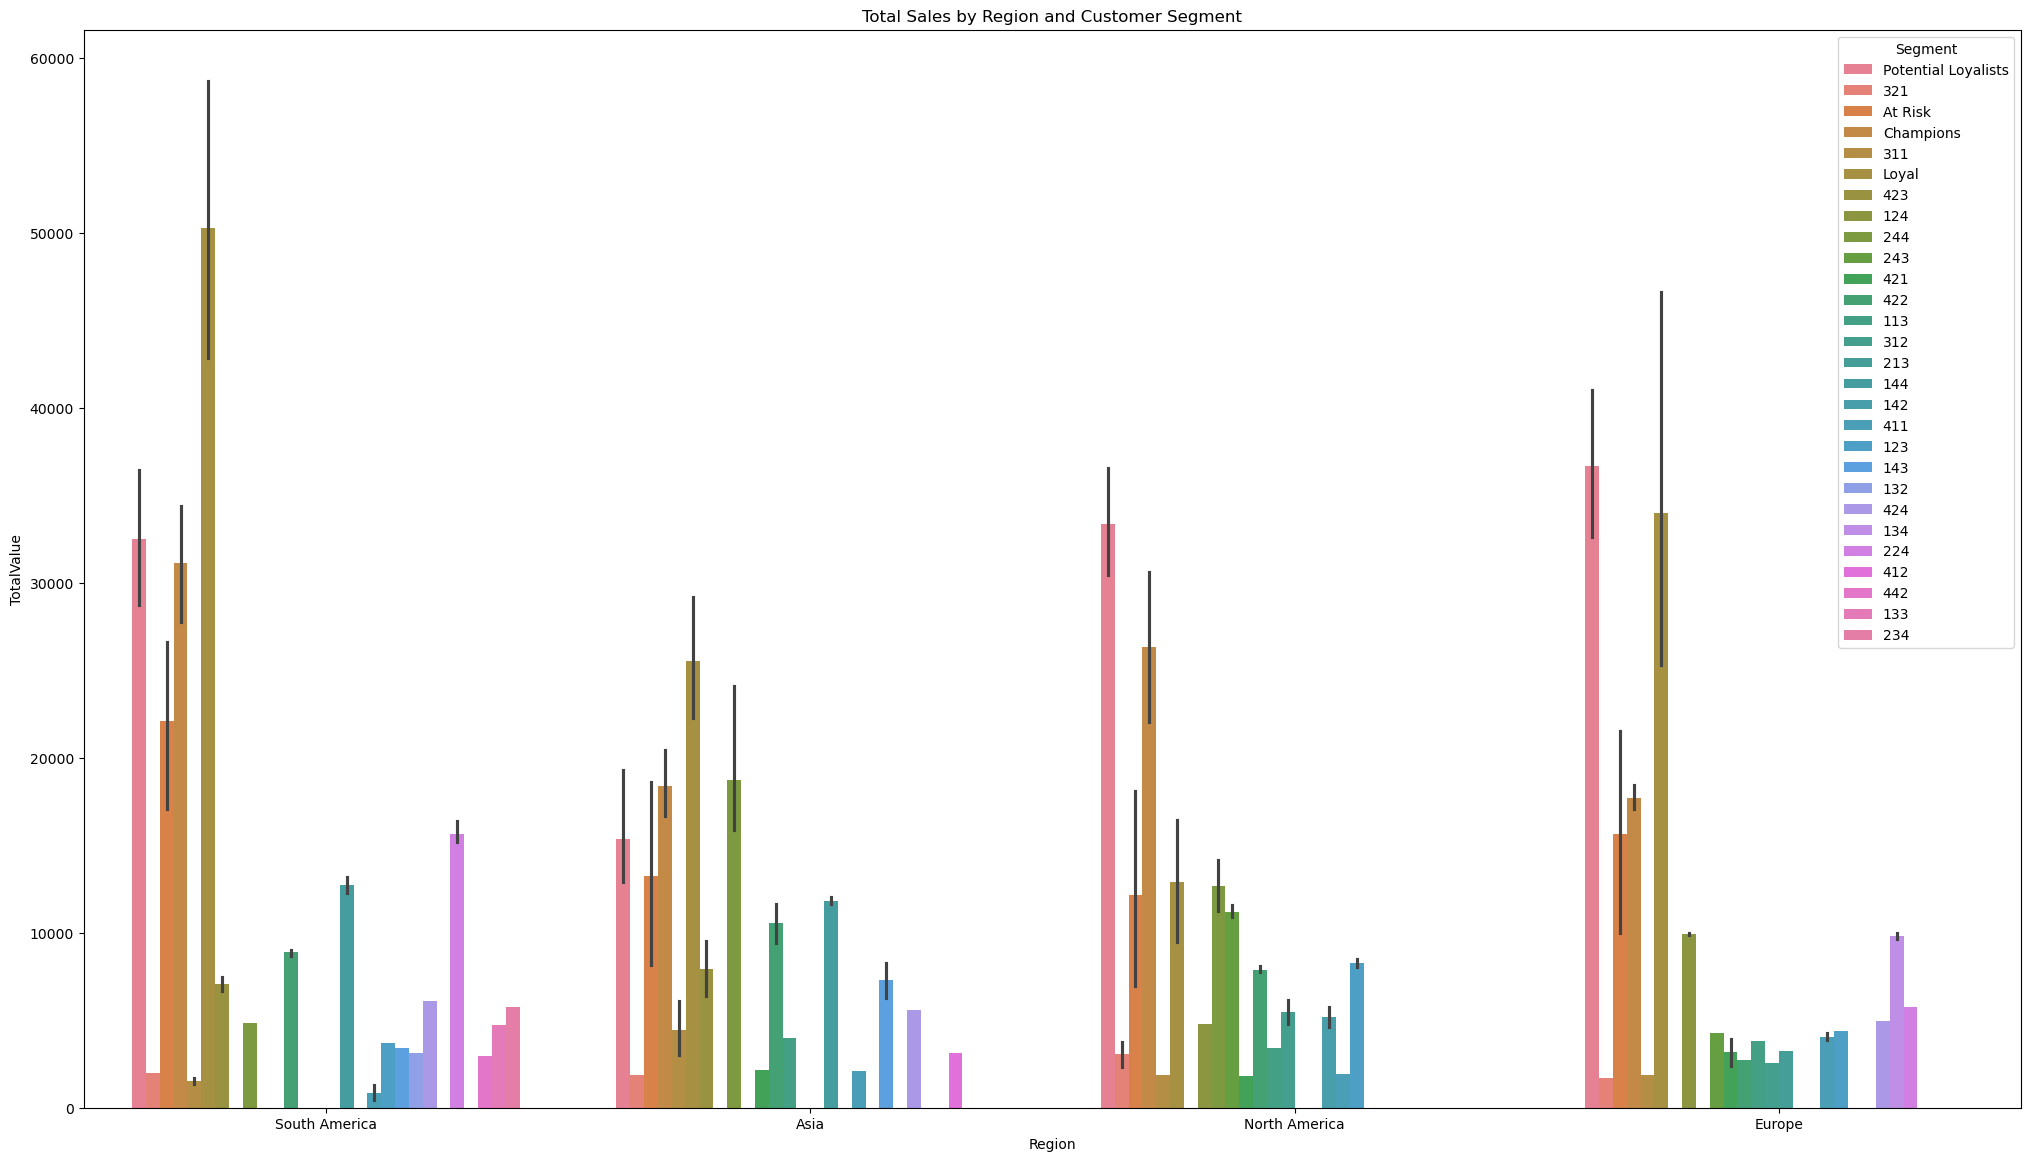

In [64]:
geo_segments = merged_data.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index()
geo_segments = geo_segments.merge(rfm[['CustomerID', 'Segment']], on='CustomerID')

plt.figure(figsize=(25, 14))
sns.barplot(data=geo_segments, x='Region', y='TotalValue', hue='Segment', estimator=sum)
plt.title('Total Sales by Region and Customer Segment')
plt.show()

In [74]:
# Average Purchase Value
avg_purchase = merged_data['TotalValue'].mean()

# Purchase Frequency (avg transactions per customer)
purchase_freq = merged_data['CustomerID'].nunique() / merged_data['TransactionID'].nunique()

# Customer Lifespan (avg time between first & last purchase)
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
customer_lifespan = (merged_data.groupby('CustomerID')['TransactionDate']
                     .agg(['min', 'max']))
customer_lifespan['lifespan_days'] = (customer_lifespan['max'] - customer_lifespan['min']).dt.days
avg_lifespan = customer_lifespan['lifespan_days'].mean() / 365  # Convert to years

# Calculate CLV
clv = avg_purchase * purchase_freq * avg_lifespan
print(f"Average CLV: ${clv:.2f}")

Average CLV: $84.43


# Here are five detailed business insights derived from the EDA findings:

## 1. Regional Sales Dominance and Opportunities.

- South America leads with the highest number of transactions (304), followed by North America (244), Europe (234), and Asia (218).
- This suggests that targeted marketing and supply chain optimization in South America could further enhance profitability.
- Conversely, Asia, despite its vast population, has lower transactions, signaling an untapped market. Strategic marketing campaigns and localized product offerings could drive growth in that region.

## 2. Product Category Performance and Growth Potential

- The highest-selling categories are Books (270 transactions), followed by Electronics (254), Home Decor (248), and Clothing (228).
- Books are currently the most popular category, but Electronics have a higher average transaction value, indicating greater revenue per sale.
- This highlights a dual strategy: maintaining book sales momentum while boosting electronics through cross-promotions or bundled offers.

##  3. Customer Segmentation and Targeting Opportunities

- RFM analysis segments customers into categories like **Champions (15 customers)**, **Loyal (24)**, **Potential Loyalists (36)**, and **At Risk (40)**.
- High-value and frequent buyers are crucial for sustained revenue. Targeted loyalty programs or exclusive offers can help **retain Champions and Loyalists**, while **re-engagement campaigns** can revitalize the **At Risk** segment.
- Knowing the segments allows for highly personalized marketing strategies, increasing retention and reducing churn.

## 4. Sales Performance Analysis and Optimization

- The correlation analysis showed that **TotalValue** has a strong positive correlation with **Price (0.72)** and **Quantity (0.61)**, indicating that both volume and pricing directly impact revenue.
- This implies that **strategic pricing adjustments** and **volume-based incentives** (like bulk discounts) could optimize revenue streams.
- Seasonal demand insights could further inform when to increase inventory or push promotions.

## 5. Customer Lifetime Value (CLV) and Strategic Focus



- The average Customer Lifetime Value (CLV) is **$84.43**, calculated based on average purchase value, purchase frequency, and customer lifespan.
- Enhancing CLV could be achieved through **subscription models**, **loyalty discounts**, and **improved customer experiences** to extend the average customer lifespan.
- Additionally, analyzing the purchasing behaviors of **High-Value customers (top 20%)** could reveal retention strategies to replicate across broader customer bases.
